In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from DS_models_stat import cut_cat
from DS_Planck_Unet import val_pix

In [15]:
def make_histogram(ax, red, blue, n_bins, label1='Yes matches', label2='No matches', redcoef=1, bluecoef=1):
    ax.hist(list(red) * redcoef, n_bins, color='r', log=True, histtype='step', label=label1)
    ax.hist(list(blue) * bluecoef, n_bins, color='b', log=True, histtype='step', label=label2)
    ax.legend()

In [6]:
dirname = '/home/rt2122/Data/original_catalogs/csv/'
true_cats = next(os.walk(dirname))[-1]
true_cats = [os.path.join(dirname, s) for s in true_cats]
det_cat = '/home/rt2122/Data/detected_cats/full_pz_all_found34_thr0.1_step8_no_fn.csv'

In [6]:
def match_one_by_one(ax, det_cat, true_cat, small_circle=400/3600, big_circle=1500/3600, name=None, filename=''):
    
    def func(angle, det_cat, true_cat):
        colored = []
        tr = SkyCoord(ra=np.array(true_cat['RA'])*u.degree, dec=np.array(true_cat['DEC'])*u.degree, frame='icrs')

        for i in tqdm(range(len(det_cat))):
            det = SkyCoord(ra=det_cat.loc[i, 'RA']*u.degree, dec=det_cat.loc[i, 'DEC']*u.degree, frame='icrs')
            sep = tr.separation(det).degree

            count = np.count_nonzero(sep <= angle)
            colored.extend(count * [det_cat.loc[i, 'max_pred']])

            true_cat = true_cat[sep > angle]
            if len(tr_cat) == 0:
                break
            true_cat.index = np.arange(len(true_cat))
            tr = SkyCoord(ra=np.array(true_cat['RA'])*u.degree, dec=np.array(true_cat['DEC'])*u.degree, frame='icrs')
        return colored, true_cat
    
    filered = '/home/rt2122/Data/cur/redblue/{}{}_red.npy'.format(name, filename)
    fileblue = '/home/rt2122/Data/cur/redblue/{}{}_blue.npy'.format(name, filename)

    if os.path.isfile(filered):
        red = np.load(filered)
        blue = np.load(fileblue)
    else:
        red, true_cat = func(small_circle, det_cat, true_cat)
        blue, true_cat = func(big_circle, det_cat, true_cat)

        if not (name is None):
            np.save(filered, np.array(red))
            np.save(fileblue, np.array(blue))
    
    make_histogram(ax, red, blue, 20, 'red', 'blue')

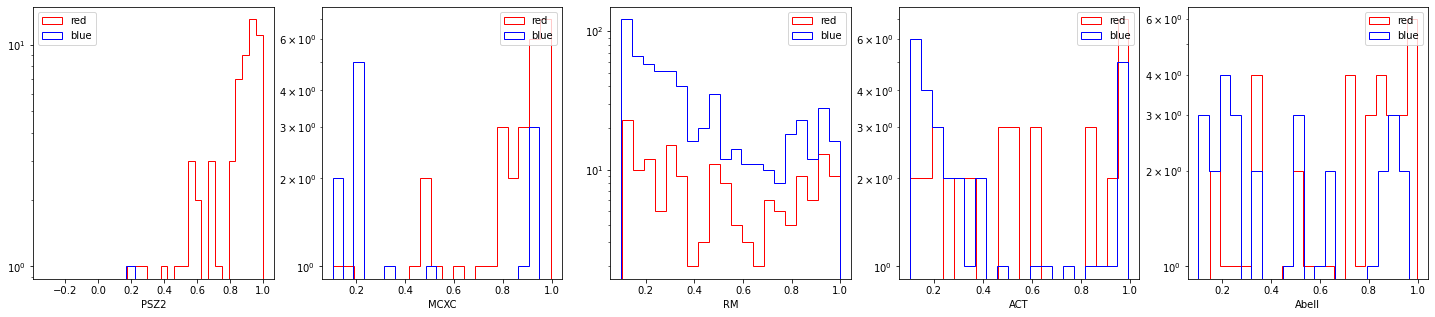

In [10]:
_, ax = plt.subplots(1, len(true_cats), figsize=(len(true_cats) * 5, 5))
for i, tr_cat in enumerate(true_cats):
    name=os.path.splitext(os.path.basename(tr_cat))[0]
    match_one_by_one(ax[i], cut_cat(pd.read_csv(det_cat), big_pix = 38), 
                     cut_cat(pd.read_csv(tr_cat), big_pix = 38), name=name)
    ax[i].set_xlabel(name)

Text(0.5, 0, 'PSZ2')

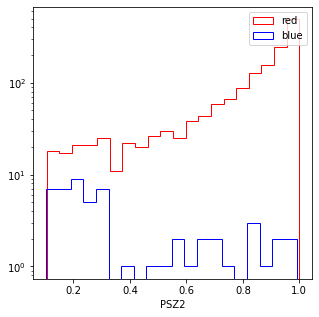

In [32]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))
match_one_by_one(ax, pd.read_csv(det_cat), 
                 pd.read_csv('/home/rt2122/Data/original_catalogs/csv/PSZ2.csv'))
ax.set_xlabel('PSZ2')

PSZ2
MCXC
RM
ACT
Abell


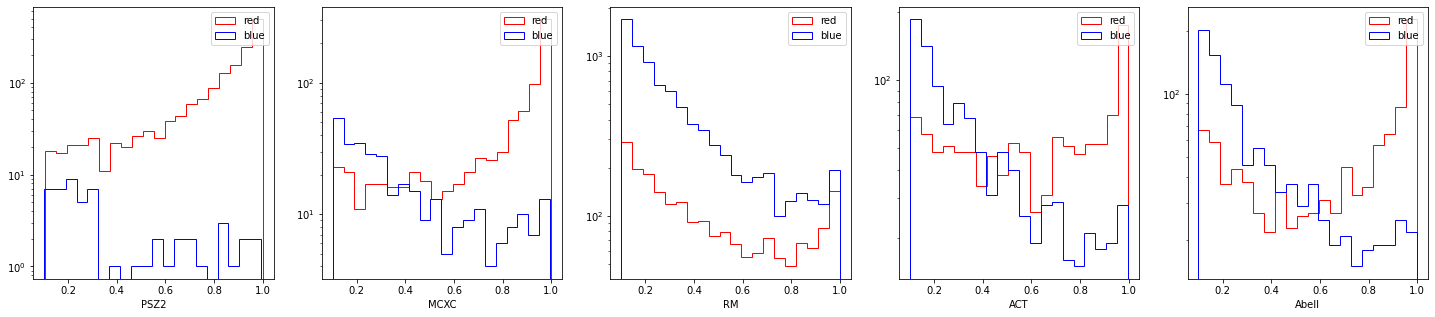

In [24]:
_, ax = plt.subplots(1, len(true_cats), figsize=(len(true_cats) * 5, 5))
for i, tr_cat in enumerate(true_cats):
    name=os.path.splitext(os.path.basename(tr_cat))[0]
    print(name)
    match_one_by_one(ax[i], pd.read_csv(det_cat), pd.read_csv(tr_cat), name=name)
    ax[i].set_xlabel(name)

In [19]:
'{}'.format(None)

'None'

In [12]:
def match_one_by_one_constant_gt(ax, det_cat, true_cat, small_circle=400/3600, big_circle=1500/3600, name=None, filename='',
                                redname='red', bluename='blue', redcoef=1, bluecoef=1):
    
    def func(angle1, angle2, det_cat, true_cat):
        colored = []
        tr = SkyCoord(ra=np.array(true_cat['RA'])*u.degree, dec=np.array(true_cat['DEC'])*u.degree, frame='icrs')

        for i in range(len(det_cat)):
            det = SkyCoord(ra=det_cat.loc[i, 'RA']*u.degree, dec=det_cat.loc[i, 'DEC']*u.degree, frame='icrs')
            sep = tr.separation(det).degree

            count = np.count_nonzero(np.logical_and(angle1 < sep, sep <= angle2))
            colored.extend(count * [det_cat.loc[i, 'max_pred']])

        return colored 
    
    filered = '/home/rt2122/Data/cur/redblue/const_gt/{}{}_red.npy'.format(name, filename)
    fileblue = '/home/rt2122/Data/cur/redblue/const_gt/{}{}_blue.npy'.format(name, filename)

    if os.path.isfile(filered):
        red = np.load(filered)
        blue = np.load(fileblue)
    else:
        red = func(0, small_circle, det_cat, true_cat)
        blue = func(small_circle, big_circle, det_cat, true_cat)

        if not (name is None):
            np.save(filered, np.array(red))
            np.save(fileblue, np.array(blue))
    
    make_histogram(ax, red, blue, 20, redname, bluename, redcoef=redcoef, bluecoef=bluecoef)

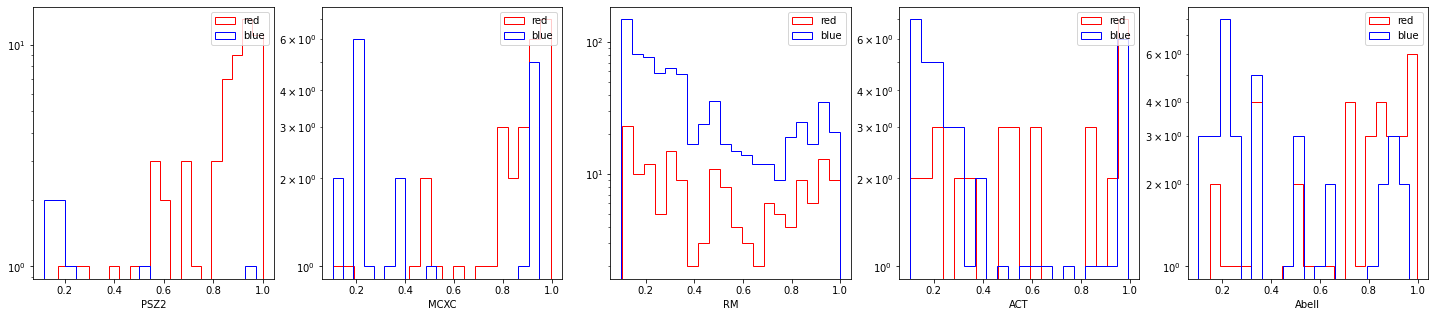

In [9]:
_, ax = plt.subplots(1, len(true_cats), figsize=(len(true_cats) * 5, 5))
for i, tr_cat in enumerate(true_cats):
    name=os.path.splitext(os.path.basename(tr_cat))[0]
    match_one_by_one_constant_gt(ax[i], cut_cat(pd.read_csv(det_cat), big_pix = val_pix), 
                     cut_cat(pd.read_csv(tr_cat), big_pix = 38), name=name, filename='val')
    ax[i].set_xlabel(name)

In [13]:
red_square=np.pi * (400 ** 2)
blue_square=np.pi * (1500 **2) - red_square
red_square, blue_square

(502654.8245743669, 6565928.646002667)

In [18]:
blue_square/red_square

13.062499999999998

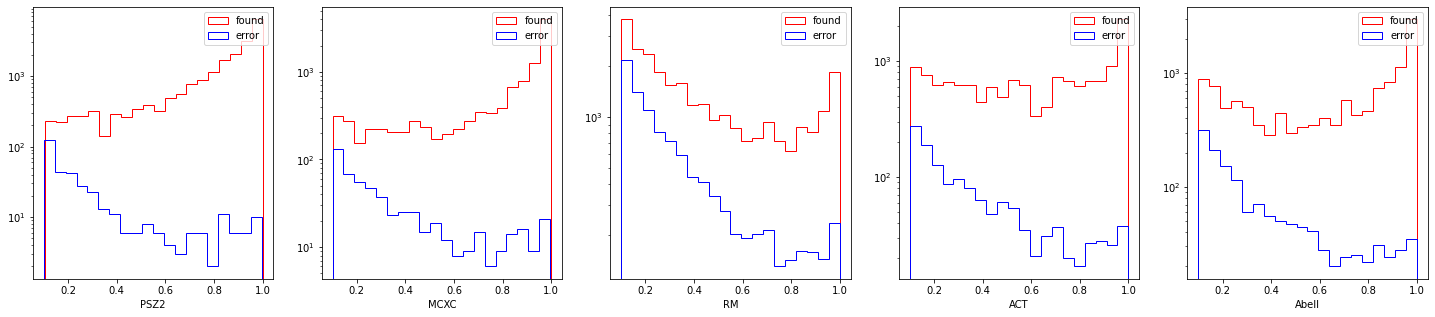

In [22]:
_, ax = plt.subplots(1, len(true_cats), figsize=(len(true_cats) * 5, 5))
for i, tr_cat in tqdm(enumerate(true_cats)):
    name=os.path.splitext(os.path.basename(tr_cat))[0]
    match_one_by_one_constant_gt(ax[i], pd.read_csv(det_cat), 
                     pd.read_csv(tr_cat), name=name, filename='', redname='found', bluename='error', 
                                 redcoef=int(blue_square/red_square))
    ax[i].set_xlabel(name)

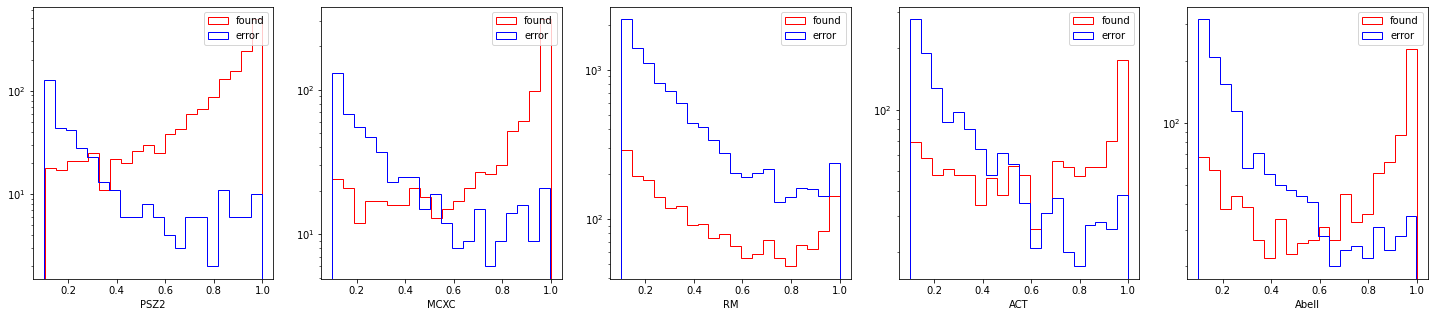

In [21]:
_, ax = plt.subplots(1, len(true_cats), figsize=(len(true_cats) * 5, 5))
for i, tr_cat in tqdm(enumerate(true_cats)):
    name=os.path.splitext(os.path.basename(tr_cat))[0]
    match_one_by_one_constant_gt(ax[i], pd.read_csv(det_cat), 
                     pd.read_csv(tr_cat), name=name, filename='', redname='found', bluename='error', 
                                 redcoef=1)
    ax[i].set_xlabel(name)